In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
learn=tf.contrib.learn
tf.logging.set_verbosity(tf.logging.ERROR)

In [5]:
mnist=learn.datasets.load_dataset('mnist')
data=mnist.train.images
labels=np.asarray(mnist.train.labels,dtype=np.int32)
test_data=mnist.test.images
test_labels=np.asarray(mnist.test.labels,dtype=np.int32)

Extracting MNIST-data/train-images-idx3-ubyte.gz
Extracting MNIST-data/train-labels-idx1-ubyte.gz
Extracting MNIST-data/t10k-images-idx3-ubyte.gz
Extracting MNIST-data/t10k-labels-idx1-ubyte.gz


In [6]:
max_examples=10000
data=data[:max_examples]
labels=labels[:max_examples]

In [9]:
def display(i):
    img=test_data[i]
    plt.title('Example %d. Label:%d' % (i,test_labels[i]))
    plt.imshow(img.reshape((28,28)),cmap=plt.cm.gray_r)

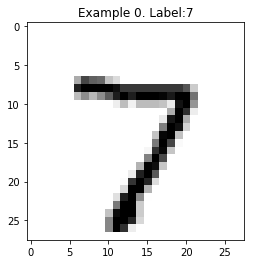

In [10]:
display(0)

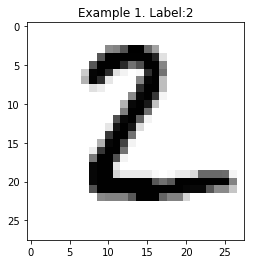

In [11]:
display(1)

In [13]:
print (len(data[0]))

784


In [14]:
feature_columns=learn.infer_real_valued_columns_from_input(data)
classifier=learn.LinearClassifier(feature_columns=feature_columns,n_classes=10)
classifier.fit(data,labels,batch_size=100,steps=1000)

LinearClassifier(params={'head': <tensorflow.contrib.learn.python.learn.estimators.head._MultiClassHead object at 0x7f2882a28630>, 'feature_columns': [_RealValuedColumn(column_name='', dimension=784, default_value=None, dtype=tf.float32, normalizer=None)], 'optimizer': None, 'gradient_clip_norm': None, 'joint_weights': False})

In [17]:
classifier.evaluate(test_data,test_labels)
print("accuracy of our classifier is:")
print (classifier.evaluate(test_data,test_labels))

accuracy of our classifier is:
{'loss': 0.31026524, 'accuracy': 0.91369998, 'global_step': 1000}


Predicted label and actual label are as following:
ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.framework.ops.Tensor'>):
<tf.Tensor 'report_uninitialized_variables_1/boolean_mask/Gather:0' shape=(?,) dtype=string>
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
['File "/home/arcc/anaconda3/lib/python3.6/runpy.py", line 193, in _run_module_as_main\n    "__main__", mod_spec)', 'File "/home/arcc/anaconda3/lib/python3.6/runpy.py", line 85, in _run_code\n    exec(code, run_globals)', 'File "/home/arcc/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>\n    app.launch_new_instance()', 'File "/home/arcc/anaconda3/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance\n    app.start()', 'File "/home/arcc/anaconda3/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 477, in start\n    ioloop.IOLoop.instance().start()

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.framework.ops.Tensor'>):
<tf.Tensor 'report_uninitialized_variables_1/boolean_mask/Gather:0' shape=(?,) dtype=string>
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
['File "/home/arcc/anaconda3/lib/python3.6/runpy.py", line 193, in _run_module_as_main\n    "__main__", mod_spec)', 'File "/home/arcc/anaconda3/lib/python3.6/runpy.py", line 85, in _run_code\n    exec(code, run_globals)', 'File "/home/arcc/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>\n    app.launch_new_instance()', 'File "/home/arcc/anaconda3/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance\n    app.start()', 'File "/home/arcc/anaconda3/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 477, in start\n    ioloop.IOLoop.instance().start()', 'File "/home/arcc/anaconda3/lib/python3.6/site-p

[7, 2, 1, 0, 4, 1, 4, 9, 6, 9]
7


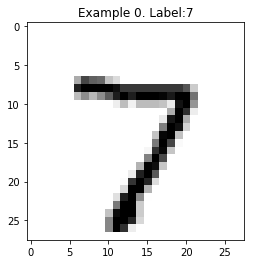

In [30]:
print("Predicted label and actual label are as following:")
print(list(classifier.predict(test_data[0:10])))
print(test_labels[0])
display(0)